In [1]:
from __future__ import print_function 
import os 

import locale
import pandas as pd 
import numpy as np 

%matplotlib inline 
from matplotlib import pyplot as plt 

from pandas.plotting import autocorrelation_plot
from pandas.plotting import register_matplotlib_converters

from statsmodels.tsa import stattools

locale.setlocale(locale.LC_ALL, '')
register_matplotlib_converters()

In [2]:
def every_nth_tick(ax, every_nth = 2):
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)

def autolabel(rects, ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., height + (height * 0.01),
                '%d' % int(height),
                ha='center', va='bottom')


def set_axes_common_properties(axe, no_grid=False):
    rv = 1
    try:
        axe.spines['top'].set_visible(False)
        axe.spines['left'].set_visible(False)
        axe.spines['right'].set_visible(False)
        axe.spines['bottom'].set_visible(False)
        if no_grid == False:
            axe.grid(color='#636262', linestyle='-.', linewidth=0.2)
        rv = 0
    except Exception as ex:
        print("Errore - {e}".format(e=str(ex)))
        
    return rv

quarter_decode = {"codice":[1 ,2 ,3 ,4], "Trimestre": ["Primo trimestre" ,"Secondo trimestre" ,"Terzo trimestre" ,"Quarto trimestre"]}
quarter_decode = pd.DataFrame.from_records(quarter_decode, columns=['codice','Trimestre'])
quarter_decode.set_index('codice', inplace=True)

genere_persona = { "codice": [1, 2, 0], "Genere": ["maschio", "femmina", "non dato"] }
genere_persona = pd.DataFrame.from_records(genere_persona, columns=['codice','Genere'])

si_no_sg16 = { "codice": [1, 2, 0], "Nazionalità Italiana": ["SI", "NO", "non dato"] }
si_no_sg16 = pd.DataFrame.from_records(si_no_sg16, columns=['codice','Nazionalità Italiana'])

tipo_lavoro = { "codice": [1, 2, 3, 4, 5, 6, 7, 8], "Tipo lavoro": [ "Un lavoro alle dipendenze" ,"Un lavoro di: Collaborazione coordinata e continuativa (con o senza progetto)" ,"Un lavoro di: Prestazione d'opera occasionale" ,"Un lavoro autonomo come: Imprenditore" ,"Un lavoro autonomo come: Libero professionista" ,"Un lavoro autonomo come: Lavoratore in proprio" ,"Un lavoro autonomo come: Coadiuvante nell'azienda di un familiare" ,"Un lavoro autonomo come: Socio di cooperativa" ] }
tipo_lavoro = pd.DataFrame.from_records(tipo_lavoro, columns=['codice','Tipo lavoro'])

regione = {"codice": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], "Regione": ["Piemonte" ,"Valle d'Aosta" ,"Lombardia" ,"Trentino alto Adige" ,"Veneto" ,"Friuli Venezia Giulia" ,"Liguria" ,"Emilia Romagna" ,"Toscana" ,"Umbria" ,"Marche" ,"Lazio" ,"Abruzzo" ,"Molise" ,"Campania" ,"Puglia" ,"Basilicata" ,"Calabria" ,"Sicilia" ,"Sardegna"]}
regione = pd.DataFrame.from_records(regione, columns=['codice','Regione'])

it_est_sg13 = {"codice": [1, 2], "Luogo nascita":["In Italia", "All'estero"]}
it_est_sg13 = pd.DataFrame.from_records(it_est_sg13, columns=['codice','Luogo nascita'])

diploma_SG24A = {"codice": ["001", "002", "003", "997"], "Diploma":["Diploma", "Afam I livello", "Afam II livello", "Non sa"],"Diploma long": ["Diploma (vecchio ordinamento)" ,"Diploma accademico di alta formazione artistica, musicale e coreutica di I livello" ,"Diploma accademico di alta formazione artistica, musicale e coreutica di II livello" ,"Non sa"]}
diploma_SG24A = pd.DataFrame.from_records(diploma_SG24A, columns=['codice','Diploma'])

laurea_SG24B = {"codice": [1 ,2 ,3 ,4 ,5], "Laurea long": [ "Master universitario di I livello/ Diploma accademico di perfezionamento o Master di I livello/Diploma accademico di specializzazione di I livello" ,"Master universitario di II livello/ Diploma accademico di perfezionamento o Master di II livello/Diploma accademico di specializzazione di II livello" ,"Diploma di specializzazione universitaria" ,"Dottorato di ricerca/Diploma accademico di formazione alla ricerca AFAM" ,"Nessuno di questi"], "Laurea": [ "Master o Laurea I livello" ,"Master o Laurea II livello" ,"Diploma di specializzazione universitaria" ,"Dottorato di ricerca/Diploma AFAM" ,"Nessuno di questi" ] }
laurea_SG24B = pd.DataFrame.from_records(laurea_SG24B, columns=['codice', 'Laurea', "Laurea long"])

age_bracket_ETAM = {
    "codice": ["00" ,"03" ,"06" ,"11" ,"15" ,"16" ,"17" ,"18" ,"19" ,"20" ,"21" ,"22" ,"23" ,"24" ,"25" ,"26" ,"27" ,"28" ,"29" ,"30" ,"31" ,"32" ,"33" ,"34" ,"35" ,"36" ,"37" ,"38" ,"39" ,"40" ,"41" ,"42" ,"43" ,"44" ,"45" ,"46" ,"47" ,"48" ,"49" ,"50" ,"51" ,"52" ,"53" ,"54" ,"55" ,"56" ,"57" ,"58" ,"59" ,"60" ,"61" ,"62" ,"63" ,"64" ,"65" ,"66" ,"67" ,"68" ,"69" ,"70" ,"71" ,"72" ,"73" ,"74" ,"75"],
    "Eta'": ["0-2" ,"03-5" ,"06-10" ,"11-14" ,"15" ,"16" ,"17" ,"18" ,"19" ,"20" ,"21" ,"22" ,"23" ,"24" ,"25" ,"26" ,"27" ,"28" ,"29" ,"30" ,"31" ,"32" ,"33" ,"34" ,"35" ,"36" ,"37" ,"38" ,"39" ,"40" ,"41" ,"42" ,"43" ,"44" ,"45" ,"46" ,"47" ,"48" ,"49" ,"50" ,"51" ,"52" ,"53" ,"54" ,"55" ,"56" ,"57" ,"58" ,"59" ,"60" ,"61" ,"62" ,"63" ,"64" ,"65" ,"66" ,"67" ,"68" ,"69" ,"70" ,"71" ,"72" ,"73" ,"74" ,"75 e +"]
}
age_bracket_ETAM = pd.DataFrame.from_records(age_bracket_ETAM, columns=['codice', "Eta'"])


In [3]:
images_path = os.path.join("..","images")
data_file = os.path.join("..","data","MICRODATI","RCFL_Microdati_2019_Secondo_trimestre.txt")

dtype_dict = {
    'ETAM': 'object'
}
df = pd.read_csv(data_file, sep='\t', lineterminator='\n',low_memory=False, dtype=dtype_dict)

# Some common varibles.
year = df['ANNO'].value_counts().index[0]
quarter = df['TRIM'].value_counts().index[0]
quarter_name = quarter_decode.loc[1]['Trimestre']
file_prefix = "{y}-{q}-".format(y=year,q=quarter)

(df.shape) #, df.dtypes)

(99333, 343)

In [4]:
df_red = df[['REG', 'SG11', 'SG13', 'SG16','ETAM']]
df_red = pd.merge(df_red, regione, left_on='REG', right_on='codice')
df_red = pd.merge(df_red, it_est_sg13, left_on='SG13', right_on='codice')
df_red = pd.merge(df_red, si_no_sg16, left_on='SG16', right_on='codice')
df_red = pd.merge(df_red, genere_persona, left_on='SG11', right_on='codice')
df_red = pd.merge(df_red, age_bracket_ETAM, left_on='ETAM', right_on='codice')

#df_red.rename(index=str, columns={"ETAM": "Eta'"}, inplace=True)

df_red.drop(columns=['codice_x', 'REG', 'codice_y','SG13', 'SG16', 'SG11', 'ETAM', 'codice'], inplace=True)
df_red.head(2)

,Regione,Luogo nascita,Nazionalità Italiana,Genere,Eta'
0,Molise,In Italia,SI,maschio,75 e +
1,Molise,In Italia,SI,maschio,75 e +


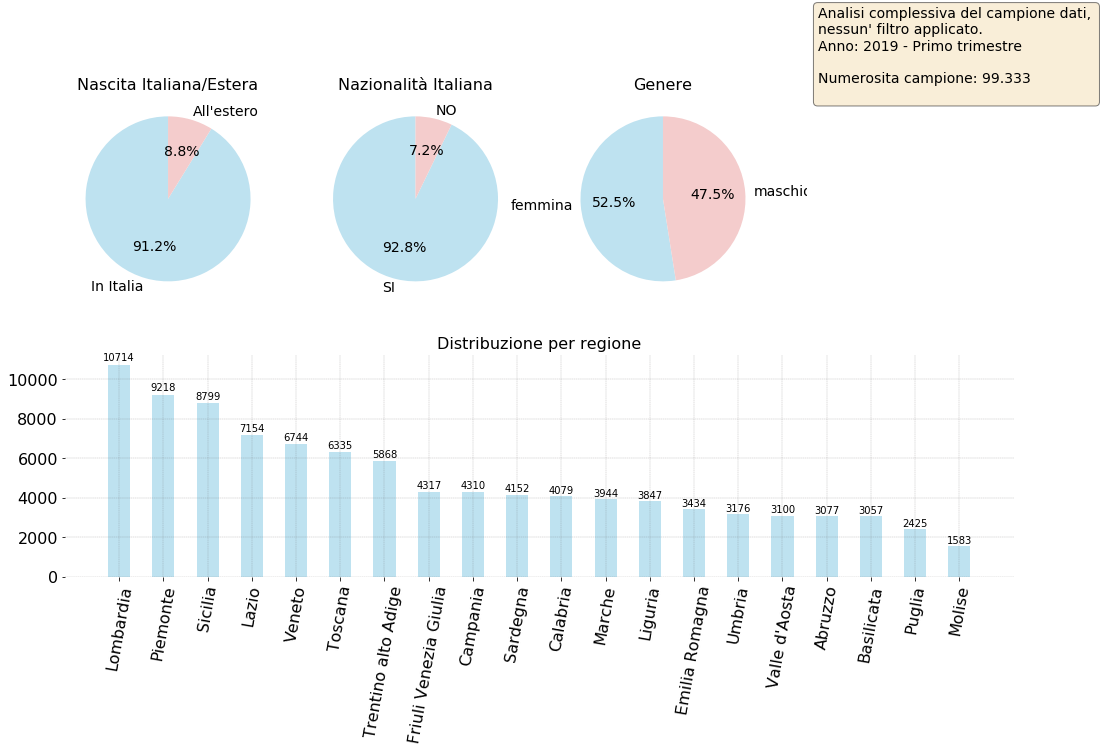

In [5]:

fig = plt.figure(figsize=(17, 9))
gs = fig.add_gridspec(2, 4)

ax = []
ax.append(fig.add_subplot(gs[0, 0]))
ax.append(fig.add_subplot(gs[0, 1]))
ax.append(fig.add_subplot(gs[0, 2]))
ax.append(fig.add_subplot(gs[0, 3]))
ax.append(fig.add_subplot(gs[1, :]))

# ------------------------------------------------------------------------
set_axes_common_properties(ax[0])

# Count of the place of birth: Italy / Other.
it_est_cnt = df_red['Luogo nascita'].value_counts()

# Count nationality of the work force.
nationality = df_red['Nazionalità Italiana'].value_counts()

# Count nationality of the work force.
gender = df_red['Genere'].value_counts()

colors = ["#BEE2F0", "#F4CCCC", "#81898c"]

# Pie chart.
ax[0].set_title("Nascita Italiana/Estera", fontsize=16)
ch1 = ax[0].pie(it_est_cnt.values,
          labels=it_est_cnt.index,
          shadow=False,
          colors=colors,
          startangle=90,
          autopct='%1.1f%%',
          textprops={'fontsize': 14})

# ------------------------------------------------------------------------
ax[1].set_title("Nazionalità Italiana", fontsize=16)
ch2 = ax[1].pie(nationality.values,
          labels=nationality.index,
          shadow=False,
          colors=colors,
          startangle=90,
          autopct='%1.1f%%',
          textprops={'fontsize': 14})

# ------------------------------------------------------------------------
ax[2].set_title("Genere", fontsize=16)
ch2 = ax[2].pie(gender.values,
          labels=gender.index,
          shadow=False,
          colors=colors,
          startangle=90,
          autopct='%1.1f%%',
          textprops={'fontsize': 14})

# ------------------------------------------------------------------------
sample_num = f'{df.shape[0]:n}'.format()
text = """Analisi complessiva del campione dati, 
nessun' filtro applicato.
Anno: {y} - {q}

Numerosita campione: {n}
""".format(y=year,q=quarter_name,n=sample_num)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax[3].text(0.05, 0.95, text, fontsize=14, bbox=props)
set_axes_common_properties(ax[3], True)
ax[3].get_xaxis().set_ticks([])
ax[3].get_yaxis().set_ticks([])

# ------------------------------------------------------------------------
width = 0.5

regions_dist = df_red['Regione'].value_counts().to_frame()
region_num = regions_dist['Regione']
region_labels = regions_dist.index

rects_region = ax[4].bar(region_labels, region_num, width=width, color=colors[0])
set_axes_common_properties(ax[4])

autolabel(rects_region, ax[4])

ax[4].set_xticklabels(region_labels, rotation=80)
ax[4].tick_params(axis='both', labelsize=16)
ax[4].set_title("Distribuzione per regione", fontsize=16)

plt.savefig(os.path.join(images_path,"{prefix}forza_lavoro_composizione.png".format(prefix=file_prefix)))




In [7]:
esteri_mask = df_red['Nazionalità Italiana'] != 'SI'
df_red[esteri_mask].head(3)

,Regione,Luogo nascita,Nazionalità Italiana,Genere,Eta'
6812,Veneto,All'estero,NO,maschio,75 e +
6813,Veneto,All'estero,NO,maschio,75 e +
6814,Veneto,All'estero,NO,maschio,75 e +


In [8]:
# Filter out all the Italian elements in the sample.
esteri_mask = df_red['Nazionalità Italiana'] != 'SI'

foreigner_male = esteri_mask & (df_red['Genere'] == 'maschio')
foreigner_female = esteri_mask & (df_red['Genere'] == 'femmina')

foreigner_male_by_age = df_red[foreigner_male]["Eta'"].value_counts()
foreigner_male_by_age.sort_index(ascending=True, inplace=True)

foreigner_female_by_age = df_red[foreigner_female]["Eta'"].value_counts()
foreigner_female_by_age.sort_index(ascending=True, inplace=True)

df_red[foreigner_male].head(2) #["Eta'"].value_counts()

,Regione,Luogo nascita,Nazionalità Italiana,Genere,Eta'
6812,Veneto,All'estero,NO,maschio,75 e +
6813,Veneto,All'estero,NO,maschio,75 e +


In [8]:
foreigner_male_by_age.sort_index(ascending=True, inplace=True)
#foreigner_male_by_age

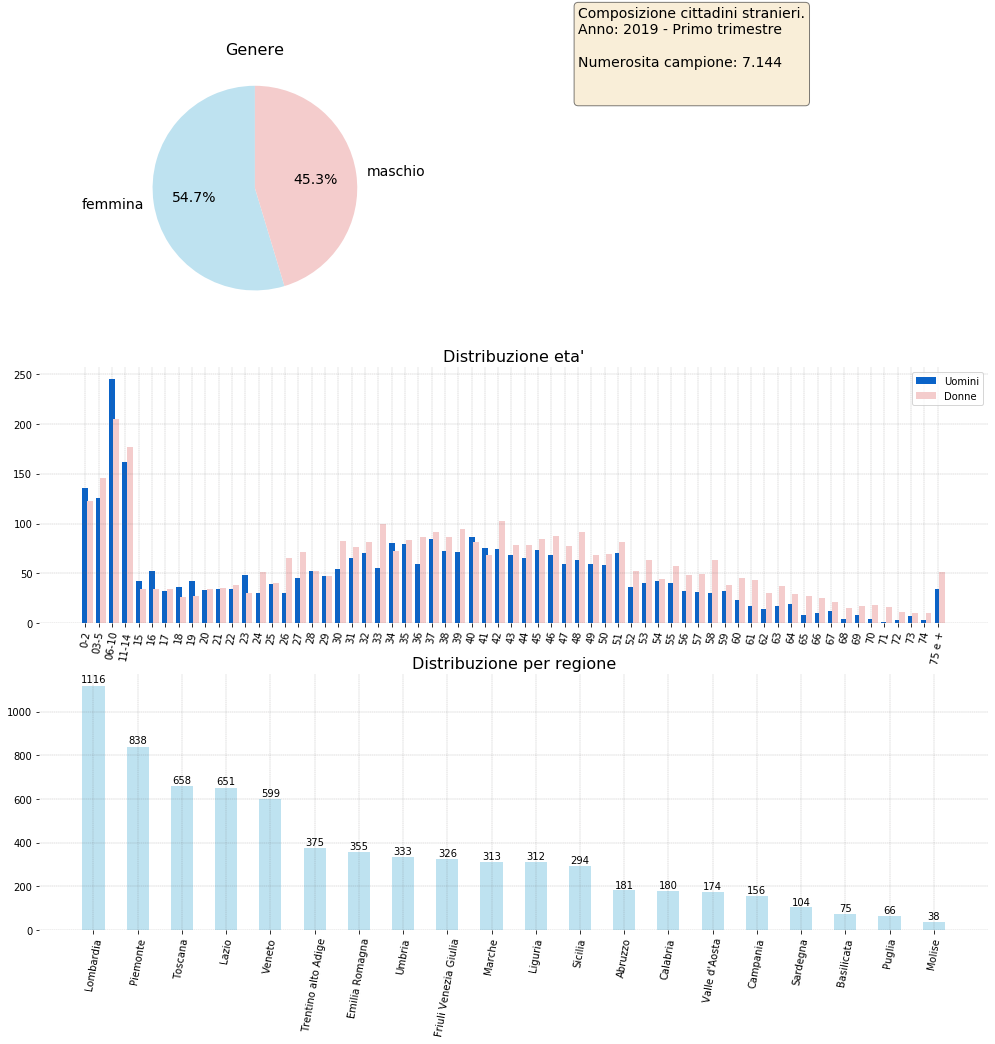

In [56]:

fig = plt.figure(figsize=(17, 16))
gs = fig.add_gridspec(3, 2)

ax = []
ax.append(fig.add_subplot(gs[0, 0]))
ax.append(fig.add_subplot(gs[0, 1]))
ax.append(fig.add_subplot(gs[1, :]))
ax.append(fig.add_subplot(gs[2, :]))

male_color_index = 0
female_color_index = 1
colors = {
    "default": "#BEE2F0",
    "male": "#BEE2F0",
    "male dark": "#0a63c8",
    "female": "#F4CCCC"
}

foreneirs_sample_num = f'{df_red[esteri_mask].shape[0]:n}'.format()
text = """Composizione cittadini stranieri.
Anno: {y} - {q}

Numerosita campione: {n}

""".format(y=year, q=quarter_name, n=foreneirs_sample_num)

# -------------------------------------------------
# Pie chart.
idx = 0
set_axes_common_properties(ax[idx])

gender = df_red[esteri_mask]['Genere'].value_counts()
ax[idx].set_title("Genere", fontsize=16)
ch1 = ax[idx].pie(gender.values,
                labels=gender.index,
                shadow=False,
                colors=[colors['male'],colors['female']],
                startangle=90,
                autopct='%1.1f%%',
                textprops={'fontsize': 14})

# --------------------------------------------------------
# Test box.
idx = 1
set_axes_common_properties(ax[idx], True)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax[idx].text(0.05, 0.85, text, fontsize=14, bbox=props)
ax[idx].get_xaxis().set_ticks([])
ax[idx].get_yaxis().set_ticks([])

# -------------------------------------------------
# Age distribution per gender - bar char with the 
# figures sde by side.
idx = 2
set_axes_common_properties(ax[idx])
ax[idx].set_title("Distribuzione eta'", fontsize=16)

width = 0.45
male_idx = np.asarray([i for i in range(len(foreigner_male_by_age.index))])
male_num = foreigner_male_by_age.values

female_idx = np.asarray([i for i in range(len(foreigner_female_by_age.index))])
female_num = foreigner_female_by_age.values

rects_male   = ax[idx].bar(foreigner_male_by_age.index, male_num  , width=width, color=colors['male dark'], label='Uomini')
rects_female = ax[idx].bar(female_idx+0.32            , female_num, width=width, color=colors['female'], label='Donne')
ax[idx].legend()

#every_nth_tick(ax[idx], every_nth = 3)
ax[idx].tick_params(axis='both', labelsize=10)
ax[idx].set_xticklabels(foreigner_female_by_age.index, rotation=80)

# ------------------------------------------------------------------------
idx = 3
width = 0.5

regions_dist = df_red[esteri_mask]['Regione'].value_counts().to_frame()
region_num = regions_dist['Regione']
region_labels = regions_dist.index

rects_region = ax[idx].bar(region_labels, region_num, width=width, color=colors['default'])
set_axes_common_properties(ax[idx])

autolabel(rects_region, ax[idx])

ax[idx].set_xticklabels(region_labels, rotation=80)
ax[idx].tick_params(axis='both', labelsize=10)
ax[idx].set_title("Distribuzione per regione", fontsize=16)

plt.savefig(os.path.join(images_path,"{prefix}lavoratori_esteri.png".format(prefix=file_prefix)))


In [47]:
gender = df_red[esteri_mask]['Genere'].value_counts()
gender

femmina    3905
maschio    3239
Name: Genere, dtype: int64